# Data Exploration
In this notebook we understand how the data is organized and explore basic features of the data.

In [1]:
#import some packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import math
from datetime import datetime
from nltk.stem.snowball import EnglishStemmer


sns.set_theme(style="darkgrid")



In [2]:
#import data
df_tw  = pd.read_csv("Data/auspol2019.csv")
df_geo = pd.read_csv("Data/location_geocode.csv")

In [3]:
df_tw.sample(10)

,created_at,id,full_text,retweet_count,favorite_count,user_id,user_name,user_screen_name,user_description,user_location,user_created_at
151613,2019-05-18 20:39:38,1129849045734764544,I was really hoping that my fellow citizens wo...,0.0,2.0,8.447619e+17,Elissa 🦄,_elissamaree_,Essential oils would help climate change,Australia,2017-03-23 04:05:03
160364,2019-05-18 10:39:57,1129698131266818048,Twonk #ausvotes https://t.co/skXJznt1AP,0.0,1.0,1.165268e+09,Kirsty B,MagpiePants,Thirtyish Scorpio RedDwarf Supernatural Starga...,"Adelaide, South Australia",2013-02-10 08:01:39
20267,2019-05-17 05:15:37,1129254122178326528,今週末18日は豪総選挙です↓\n\n豪世論調査、野党労働党が総選挙勝利の情勢 https:/...,0.0,5.0,2.439985e+08,横尾 寧子,yokooyasuko,FXアドバイザー/テクニカルアナリスト メディック投資顧問株式会社取締役 著書「FXチャート...,東京都渋谷区千駄ヶ谷,2011-01-28 08:14:12
13551,2019-05-18 12:25:08,1129724598818398214,"#Australia 🇦🇺 Has my vote tonight. Creative, c...",0.0,3.0,2.346747e+07,Martin Cabble-Reid,martincabble,Entertainer|Husband|Dogfather|Alter-ego @cruis...,Berkshire,2009-03-09 17:38:31
78529,2019-05-17 23:15:58,1129525999228424192,"Ok Straya, do me proud. Watching from overseas...",0.0,3.0,3.170349e+07,Rock Doc,BoredPostdoc,Industry research scientist. Former university...,127.0.0.1,2009-04-16 09:25:42
29802,2019-05-11 00:40:03,1127010444479123457,"Who will win the next election? LNP, ALP? Nah,...",2.0,4.0,1.786689e+08,💧💧Tao de Haas,TaodeHaas,"Psychotherapist, Speaker, Social Ecologist, Co...","Sydney, New South Wales",2010-08-15 10:45:06
116902,2019-05-14 07:18:56,1128197989783093249,Maybe because it's absolute bullshit ? #auspol...,1.0,2.0,4.854974e+08,🍌Leftie Troublemaker🍍,MinhKular,#antiracist #VAW #animallover #Unionthug #True...,Cape York,2012-02-07 08:14:00
57720,2019-05-18 12:18:19,1129722885336162305,Looks like im zapping meself tonite sweet drea...,0.0,0.0,1.065537e+18,theElepthantinTheRoom,elepthantin,NaN,NaN,2018-11-22 09:26:07
129424,2019-05-13 00:37:52,1127734669493952512,"With respect, the last thing the ABC should be...",2.0,2.0,2.522782e+07,Michael Byrnes,MichaelByrnes,"Poet, Fool or Bum. Film. Music. Politics. Radi...","Sydney, Australia",2009-03-19 03:22:13
27262,2019-05-13 10:08:30,1127878276519620608,"@imamette @MEMRIReports Same shit, different l...",0.0,2.0,1.569708e+09,Sceptical Aussie (Noob - to my son) 🇦🇺,ScepticalAussie,"Dark humour, centrist/atheist. Tweet things fu...",Australia July 2014,2013-07-05 04:50:52


In [4]:
df_geo.sample(10)

,name,lat,long
7558,"Kansai, Japan",34.432002,135.230394
8688,ROCKWELL,37.090240,-95.712891
5961,"Riverina, NSW, Australia",-34.288650,146.049891
2714,"Granite City, IL",38.701439,-90.148720
8991,Between Beckom & Melbourne,-34.307428,146.984948
3514,"Born Edinburgh, now Prague, CZ",55.953252,-3.188267
4330,"Sydney, AUS",-33.868820,151.209295
3951,Ballarat,-37.562159,143.850256
1421,earth,37.232108,-95.724334
9428,"Gubbi gubbi country (Sunshine Coast, Qld)",-26.650000,153.066667


Let's understand a few basic properties of the data. On thing that was observed is that there are potential entries that are entered incorrectly. We will find these entries!

In [5]:
#Finding indices of Data that is incorrect/incomplete

potential_bad_indices = []
for index in df_tw.index:
    for col in list(df_tw.columns):
        if type(df_tw.loc[[index]][col].iloc[0]) == str:
            continue
        if math.isnan(df_tw.loc[[index]][col].iloc[0]):
            potential_bad_indices = potential_bad_indices + [index]
    
    


In [6]:
df_tw.loc[potential_bad_indices].sample(10)
#list(df_tw.columns)

,created_at,id,full_text,retweet_count,favorite_count,user_id,user_name,user_screen_name,user_description,user_location,user_created_at
170284,2019-05-17 23:50:45,1129534754309648384,@dr_krystal While on the white Senate ballot p...,0.0,1.0,4.040266e+08,blastnost,blastnost,Medical Scientist (Chronobiology),NaN,2011-11-03 10:24:41
138074,2019-05-12 00:01:06,1127363031816519681,The always brilliant ⁦@GoldingCartoons⁩. #aus...,0.0,1.0,5.825748e+08,Duska Sulicich,DuskaSulicich,Editor of The Sunday Age. All views my own; RT...,NaN,2012-05-17 06:16:00
28329,2019-05-12 14:24:52,1127580402778959878,Labor says Scott Morrison cut $14 billion from...,0.0,0.0,1.359383e+08,Rad,Radford57,NaN,"Perth, Western Australia",2010-04-22 15:57:43
70861,2019-05-18 07:14:07,1129646331134300166,"""We have ways of making you report!"" #Newspeak...",1.0,0.0,2.671345e+09,Robert Barwick,RobbieBarwick,Director Citizens Electoral Council of Austral...,NaN,2014-07-23 02:05:35
31022,2019-05-20 09:33:45,1130406244408274944,.@ScottMorrisonMP you're metaphorically dead t...,0.0,0.0,3.153562e+08,stella c.s. lee,treelyruly,"sessional, confessional & entirely unprofessio...",NaN,2011-06-11 18:42:55
41407,2019-05-19 07:20:33,1130010338261213184,Can't wait until we jump to the part where nob...,0.0,1.0,2.480944e+08,#smugface #hero (smugfaced hero),rainedrop86,I have a six pack AND I look like Eva Longoria...,NaN,2011-02-06 06:57:12
40157,2019-05-19 09:35:21,1130044258788859908,#auspol @Lisa_Wilkinson looks like you don't k...,1.0,1.0,1.814767e+08,Pang Lim,phlim1942,just angry when some politicians take us for f...,NaN,2010-08-22 08:50:26
101699,2019-05-16 01:11:21,1128830261448151040,https://t.co/32Ozbo7ghO Crooked Coalition usin...,0.0,0.0,1.573800e+09,Cara Mia,CaraMia200,"“sick of all the stiffs , sick of all the dips...",NaN,2013-07-06 22:38:51
770,2019-05-20 05:32:16,1130345472114208768,"Australia's Prime Minister Holds Onto Power, D...",0.0,0.0,8.454497e+17,DeepFind,DeepFinds,"news website. https://t.co/aiHWeWzaoe, sister ...",NaN,2017-03-25 01:38:21
28090,2019-05-12 23:10:44,1127712743404916738,Free speech is now blocked in Australia unless...,0.0,1.0,9.652475e+07,KJ,KianJorry,NaN,NaN,2009-12-13 10:12:12


We see that a lot of these'NotANumber' entries are in user_location, user_description, which is not a problem. However, there are other entries that are incomplete! We will find this entries next.

In [7]:
bad_indices= []
for index in df_tw.loc[potential_bad_indices].index:
    for col in ['created_at', 'full_text', 'id', 'favorite_count', 'retweet_count','user_created_at']:
        if type(df_tw.loc[[index]][col].iloc[0]) == str:
            continue
        if math.isnan(df_tw.loc[[index]][col].iloc[0]):
            bad_indices = bad_indices + [index]

In [8]:
df_tw.loc[bad_indices]

,created_at,id,full_text,retweet_count,favorite_count,user_id,user_name,user_screen_name,user_description,user_location,user_created_at
63778,2019-05-18 10:45:32,1129699533758259201,I see brain dead people #auspol,1.0,1.0,19761704.0,💧Cathleen McVey Eades,cathleen5,Writer/Producer/Director/ Digital editor semi-...,NaN,NaN
63778,2019-05-18 10:45:32,1129699533758259201,I see brain dead people #auspol,1.0,1.0,19761704.0,💧Cathleen McVey Eades,cathleen5,Writer/Producer/Director/ Digital editor semi-...,NaN,NaN
63779,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63779,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63779,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
178211,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178211,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178211,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178211,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can clearly see the issues! There is one entry that appears several times, and it is clearly entered incorrectly. We will delete all these entries. We can also see that some these 234 possible incorrect data are because there is no information of the date when the user was created - we can ignore this as it doesn't seem a big problem.

In [9]:
indices_repeated_entry= []
for index in df_tw.loc[bad_indices].index:
    for col in ['created_at', 'full_text', 'id', 'favorite_count', 'retweet_count']:
        if type(df_tw.loc[[index]][col].iloc[0]) == str:
            continue
        if math.isnan(df_tw.loc[[index]][col].iloc[0]):
            indices_repeated_entry = indices_repeated_entry + [index]

In [10]:
df_tw.loc[indices_repeated_entry].sample(10)

,created_at,id,full_text,retweet_count,favorite_count,user_id,user_name,user_screen_name,user_description,user_location,user_created_at
120464,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84716,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63779,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178211,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120464,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84716,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71541,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71541,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120508,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63779,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It looks that we found the bad indices! Let's double check!

In [11]:
set(df_tw.loc[indices_repeated_entry]['created_at'])

{'Born Glasgow Scotland raised in Aus. A lefty by birthright. RT usually reflects my opinion'}

Looks right! Let's delete these entries!

In [12]:
df_tw = df_tw.drop(indices_repeated_entry)

In [13]:
print("We deleted " + str(len(indices_repeated_entry)) + " entries")

We deleted 432 entries


In [14]:
#init = where we start spliggin , list_up = upperbounds
#This is just a helper to make a plot later
def barplot_prep(dic_dist,init,list_up):
    temp_dic = dic_dist
    number_a = list(temp_dic.values()) #users
    number_b = list(temp_dic.keys()) #likes
    
    ran = [ 0 for i in range(len(list_up) - 1) ]
    ran[0] = [init, list_up[0]+1]
    for j in range(1,len(list_up)-1):
        ran[j] = [list_up[j-1]+1,list_up[j]+1]
    values = [0 for i in range(len(ran) + 1) ]
    labels = [str(r[0]) + '-' + str(r[1]-1) for r in ran] + [">" + str(ran[-1][1]-1)]
    for i in range(len(ran)):
        values[i] = sum( number_a[j] for j in range(len(number_a)) if number_b[j] in range(ran[i][0],ran[i][1]))
    values[-1] = sum([number_a[j] for j in range(len(number_a)) if number_b[j] > ran[-1][1] + 1])
    return labels,values

In [15]:
tweets_by_user = {}
likes_by_user = {}
retweets_by_user = {}
#This should be written better!
for index in df_tw.index:
     likes_by_user[df_tw.loc[[index]]['user_id'].iloc[0]] = 0
     tweets_by_user[df_tw.loc[[index]]['user_id'].iloc[0]] = 0
     retweets_by_user[df_tw.loc[[index]]['user_id'].iloc[0]] = 0

for index in df_tw.index:
    if (not math.isnan(df_tw.loc[[index]]['user_id'].iloc[0])):
      tweets_by_user[df_tw.loc[[index]]['user_id'].iloc[0]] = tweets_by_user[df_tw.loc[[index]]['user_id'].iloc[0]]+1

      if (not math.isnan(df_tw.loc[[index]]['favorite_count'].iloc[0])):
            likes_by_user[df_tw.loc[[index]]['user_id'].iloc[0]] = likes_by_user[df_tw.loc[[index]]['user_id'].iloc[0]] + df_tw.loc[[index]]['favorite_count'].iloc[0]

      if (not math.isnan(retweets_by_user[df_tw.loc[[index]]['user_id'].iloc[0]])):
            retweets_by_user[df_tw.loc[[index]]['user_id'].iloc[0]] = retweets_by_user[df_tw.loc[[index]]['user_id'].iloc[0]] + df_tw.loc[[index]]['retweet_count'].iloc[0]




In [16]:
#This can likely be written cleaner! 

basic_info = {  "Number of tweets": len(set(df_tw['id'])), #check no repeated, 

                "Distinct users" : len(set(df_tw['user_id'])),

                "User(s) with most tweets": list(set(df_tw.loc[df_tw['user_id'] == max(tweets_by_user, key = tweets_by_user.get)]['user_name'])) + [tweets_by_user[list(set(df_tw.loc[df_tw['user_id'] == max(tweets_by_user, key = tweets_by_user.get)]['user_id']))[0]]],

                "User(s) with most (total) likes": list(set(df_tw.loc[df_tw['user_id'] == max(likes_by_user, key = likes_by_user.get)]['user_name'])) + [likes_by_user[list(set(df_tw.loc[df_tw['user_id'] == max(likes_by_user, key = likes_by_user.get)]['user_id']))[0]]], 

                "User with most (total) retweets ": list(set(df_tw.loc[df_tw['user_id'] == max(retweets_by_user, key = retweets_by_user.get)]['user_name'])) + [retweets_by_user[list(set(df_tw.loc[df_tw['user_id'] == max(retweets_by_user, key = retweets_by_user.get)]['user_id']))[0]]],

                "Tweet with most retweets": df_tw.loc[ df_tw['retweet_count'] == max(list(df_tw['retweet_count']))]['full_text'].iloc[0] ,

                "Tweet with most likes": df_tw.loc[ df_tw['favorite_count'] == max(list(df_tw['favorite_count']))]['full_text'].iloc[0] ,
                
                "Total Number of Retweets": sum([x for x in list(df_tw['retweet_count']) if not math.isnan(x)]),

                "Total Number of Likes": sum([x for x in list(df_tw['favorite_count']) if not math.isnan(x)]),

                "Average Number of Likes per Tweet": np.mean([x for x in list(df_tw['favorite_count']) if not math.isnan(x)]),

                "Average Number of Retweets per Tweet": np.mean([x for x in list(df_tw['retweet_count']) if not math.isnan(x)]),

                "Average Number of Tweets per User": np.mean(list(tweets_by_user.values())),

                "Average Number of Retweets per User": np.mean(list(retweets_by_user.values())) ,

                "Average Number of Likes per User": np.mean(list(likes_by_user.values())) ,
                
                "Date First Tweet": min([datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in list(df_tw['created_at'])]), 

                "Date Last Tweet": max([datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in list(df_tw['created_at'])]),
                
                "Date Oldest User": min([datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in list(df_tw['user_created_at']) if  type(x) == str]),

                "Date Newest User": max([datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in list(df_tw['user_created_at']) if  type(x) == str])
                }

In [17]:
distribution_retweet =  dict(collections.Counter(list(df_tw['retweet_count'])))
distribution_likes = dict(collections.Counter(list(df_tw['favorite_count'])) )
distribution_tweets_user = dict(collections.Counter(list(tweets_by_user.values()))) 
distribution_retweets_user = dict(collections.Counter(list(retweets_by_user.values())))
distribution_likes_user  = dict(collections.Counter(list(likes_by_user.values())))

In [18]:
print(pd.Series(basic_info))

Number of tweets                                                                   183370
Distinct users                                                                      45862
User(s) with most tweets                                                [💧 Sur Plus, 937]
User(s) with most (total) likes                                     [Van Badham, 49066.0]
User with most (total) retweets                                     [Van Badham, 14160.0]
Tweet with most retweets                Shocking defeat for Left in Australia, stunned...
Tweet with most likes                   Shocking defeat for Left in Australia, stunned...
Total Number of Retweets                                                         699430.0
Total Number of Likes                                                           2046227.0
Average Number of Likes per Tweet                                               11.159006
Average Number of Retweets per Tweet                                              3.81431
Average Nu

Text(0.5, 1.0, 'Here Goes a Title')

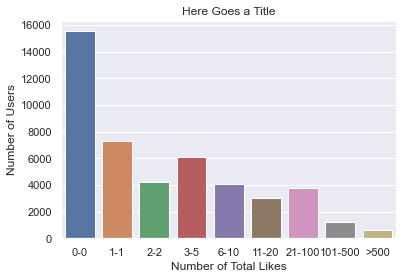

In [19]:
labels, values = barplot_prep(distribution_likes_user, 0,[0,1,2,5,10,20,100,500,1000])
p1 = sns.barplot(x = labels, y = values)
p1.set_xlabel("Number of Total Likes");
p1.set_ylabel("Number of Users");
p1.set_title("Here Goes a Title")


In [20]:
df_tw.columns

Index(['created_at', 'id', 'full_text', 'retweet_count', 'favorite_count',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_location', 'user_created_at'],
      dtype='object')

Text(0.5, 1.0, 'Here Goes a Title')

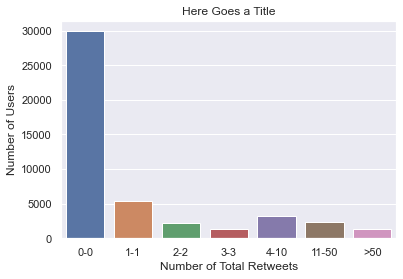

In [21]:

labels, values = barplot_prep(distribution_retweets_user, 0,[0,1,2,3,10,50,100])
p2 = sns.barplot(x = labels, y = values)
p2.set_xlabel("Number of Total Retweets");
p2.set_ylabel("Number of Users");
p2.set_title("Here Goes a Title")

Text(0.5, 1.0, 'Here Goes a Title')

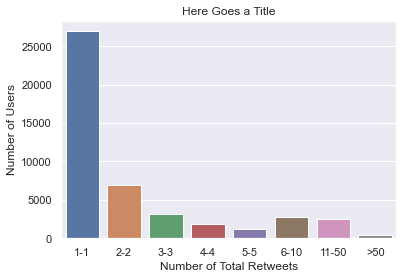

In [22]:
labels, values = barplot_prep(distribution_tweets_user, 1,[1,2,3,4,5,10,50,100])
p2 = sns.barplot(x = labels, y = values)
p2.set_xlabel("Number of Total Retweets");
p2.set_ylabel("Number of Users");
p2.set_title("Here Goes a Title")

Text(0.5, 1.0, 'Here Goes a Title')

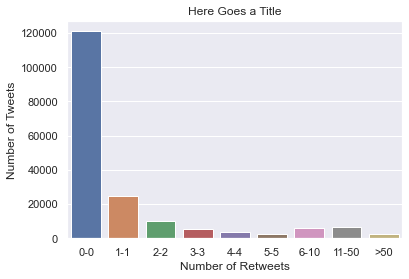

In [23]:
labels, values = barplot_prep(distribution_retweet, 0,[0,1,2,3,4,5,10,50,100])
p2 = sns.barplot(x = labels, y = values)
p2.set_xlabel("Number of Retweets");
p2.set_ylabel("Number of Tweets");
p2.set_title("Here Goes a Title")

Text(0.5, 1.0, 'Here Goes a Title')

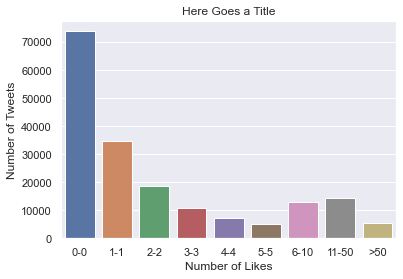

In [24]:
labels, values = barplot_prep(distribution_likes, 0,[0,1,2,3,4,5,10,50,100])
p2 = sns.barplot(x = labels, y = values)
p2.set_xlabel("Number of Likes");
p2.set_ylabel("Number of Tweets");
p2.set_title("Here Goes a Title")

**Some Observations and some things that we can try**
1. We cleaned a little our date. However, there are several entries with 'None' that should be cleaned.
2. Can't tell how accurate are the locations. There are several locations with names like "Next Door", "Nowhere & Everywhere", etc. Maybe these locations should be ignored. We cannot tell how the longitude and latitude where obtained.
3. The names of the user_location are not consistent. One alternative is to use the longitude and latitude to only record the country of origin. 

In [25]:
#This is the data set after deleating some repeated/incorrect entriees
df_tw.to_csv('Data/CleanedData.csv', index=False)